In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import time
from sklearn import metrics

Using TensorFlow backend.


In [2]:
#Import Dataset
df = pd.read_csv("adult.data")
df.head(5)

,Age,Workclass,Final_weigth,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Get the number of duplicated row
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (24, 15)


In [4]:
#Total data
df.shape

(32561, 15)

In [5]:
#Drop duplicated row
df = df.drop_duplicates()

In [6]:
df.shape

(32537, 15)

In [7]:
#Count the number of missing and null values
df.isin([' ?']).sum(axis=0)

Age                  0
Workclass         1836
Final_weigth         0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income_level         0
dtype: int64

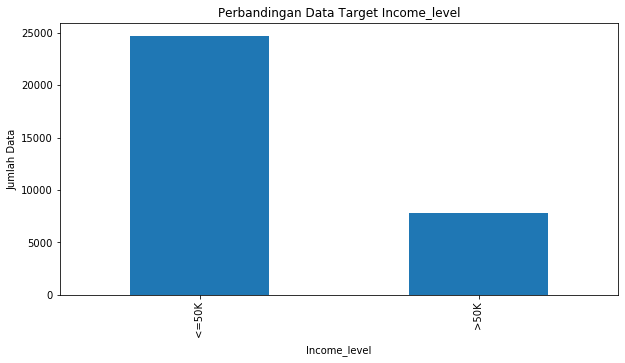

In [8]:
df.Income_level.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
pyplot.title("Perbandingan Data Target Income_level")
pyplot.ylabel('Jumlah Data')
pyplot.xlabel('Income_level');

In [9]:
pd.crosstab(df['Native_country'], df['Income_level'])

Income_level,<=50K,>50K
Native_country,,
?,436,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


In [10]:
pd.crosstab(df['Occupation'], df['Income_level'])

Income_level,<=50K,>50K
Occupation,,
?,1652,191
Adm-clerical,3261,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115
Handlers-cleaners,1283,86
Machine-op-inspct,1751,249
Other-service,3154,137


In [11]:
pd.crosstab(df['Workclass'], df['Income_level'])

Income_level,<=50K,>50K
Workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17712,4961
Self-emp-inc,494,622
Self-emp-not-inc,1816,724
State-gov,945,353
Without-pay,14,0


In [12]:
#Drop data with Missing or Null Value
df.drop(df.loc[df['Workclass']==" ?"].index, inplace=True)
df.drop(df.loc[df['Occupation']==" ?"].index, inplace=True)
df.drop(df.loc[df['Native_country']==" ?"].index, inplace=True)

In [13]:
df.isin([' ?']).sum(axis=0)

Age               0
Workclass         0
Final_weigth      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income_level      0
dtype: int64

In [14]:
df.shape

(30139, 15)

In [15]:
df.dtypes

Age                int64
Workclass         object
Final_weigth       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income_level      object
dtype: object

In [16]:
string_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income_level']
for col in string_col:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df

,Age,Workclass,Final_weigth,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_level
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [17]:
import seaborn as sns 

,Age,Workclass,Final_weigth,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income_level
Age,1.000000,0.080480,-0.076279,-0.001159,0.043203,-0.276227,-0.005662,-0.246482,0.023858,0.081827,0.080162,0.060141,0.101348,-0.002339,0.242017
Workclass,0.080480,1.000000,-0.032412,0.017818,0.037772,-0.034169,0.015622,-0.067394,0.044740,0.074939,0.035339,0.007185,0.050697,0.007580,0.018030
Final_weigth,-0.076279,-0.032412,1.000000,-0.027004,-0.045199,0.032119,-0.000022,0.009234,-0.024093,0.025602,0.000420,-0.009755,-0.023033,-0.066503,-0.008992
Education,-0.001159,0.017818,-0.027004,1.000000,0.345312,-0.040678,-0.038176,-0.012923,0.011334,-0.027967,0.030617,0.015075,0.060440,0.078176,0.079039
Education_num,0.043203,0.037772,-0.045199,0.345312,1.000000,-0.063254,0.087702,-0.092227,0.033018,0.006049,0.124455,0.079613,0.152842,0.090642,0.335413
Marital_status,-0.276227,-0.034169,0.032119,-0.040678,-0.063254,1.000000,0.022529,0.178034,-0.068590,-0.119872,-0.042392,-0.035155,-0.188889,-0.025470,-0.193404
Occupation,-0.005662,0.015622,-0.000022,-0.038176,0.087702,0.022529,1.000000,-0.053706,0.000735,0.062530,0.022151,0.014585,0.018428,-0.003380,0.051476
Relationship,-0.246482,-0.067394,0.009234,-0.012923,-0.092227,0.178034,-0.053706,1.000000,-0.117116,-0.585031,-0.058285,-0.063601,-0.257748,-0.010942,-0.251026
Race,0.023858,0.044740,-0.024093,0.011334,0.033018,-0.068590,0.000735,-0.117116,1.000000,0.089429,0.014371,0.023545,0.048549,0.124839,0.071689
Sex,0.081827,0.074939,0.025602,-0.027967,0.006049,-0.119872,0.062530,-0.585031,0.089429,1.000000,0.048819,0.047008,0.231126,0.000284,0.216668


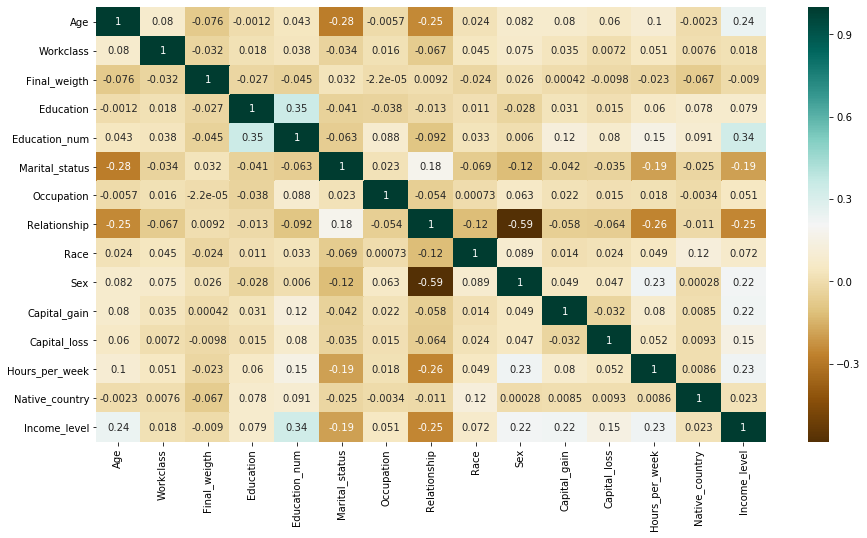

In [18]:
pyplot.figure(figsize=(15,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [19]:
pd.crosstab(df['Workclass'], df['Income_level'])

Income_level,0,1
Workclass,,
0,578,365
1,1458,609
2,17390,4874
3,474,600
4,1784,714
5,935,344
6,14,0


In [20]:
pd.crosstab(df['Occupation'], df['Income_level'])

Income_level,0,1
Occupation,,
0,3221,498
1,8,1
2,3117,908
3,2054,1937
4,872,115
5,1266,83
6,1720,244
7,3077,132
8,140,1


In [21]:
pd.crosstab(df['Workclass'], df['Occupation'])

Occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Workclass,,,,,,,,,,,,,,
0,316,9,63,179,8,22,14,34,0,167,27,14,66,24
1,281,0,143,212,29,46,11,189,0,692,304,7,38,115
2,2791,0,3142,2646,448,1254,1880,2662,141,2250,186,2895,722,1247
3,28,0,99,385,51,2,10,27,0,157,5,281,3,26
4,49,0,522,383,430,15,35,173,0,365,6,376,26,118
5,251,0,55,186,15,9,13,123,0,403,116,11,56,41
6,3,0,1,0,6,1,1,1,0,0,0,0,0,1


In [22]:
df_new = pd.concat([df['Workclass'], df['Occupation'], df['Income_level']], axis=1)

In [23]:
find_data = df_new.get((df_new['Workclass'] == 1) & (df_new['Occupation'] == 12) & (df_new['Income_level'] == 1))
find_data.count()

Workclass       15
Occupation      15
Income_level    15
dtype: int64

In [24]:
find_data = df_new.get((df_new['Workclass'] == 1) & (df_new['Occupation'] == 12) & (df_new['Income_level'] == 0))
find_data.count()

Workclass       23
Occupation      23
Income_level    23
dtype: int64

In [25]:
feature_cols = ['Workclass', 'Final_weigth', 'Education', 'Education_num','Marital_status','Occupation','Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
X = df[feature_cols] # Features
y = df.Income_level # Target variable

In [26]:
from sklearn import preprocessing #untuk normalisasi
from imblearn.over_sampling import SMOTE #oversampling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #confusion matrix

In [27]:
#Normalize Data
X = preprocessing.normalize(X)

In [28]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

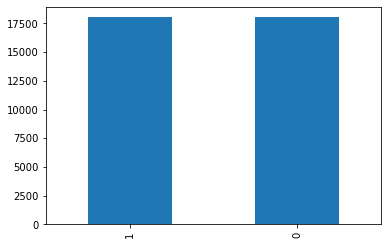

In [29]:
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
pd.Series(y_train_new).value_counts().plot.bar()

In [30]:
y_train_new = y_train_new.reshape(-1,1)

In [31]:
X_train = X_train_new
y_train = y_train_new

In [32]:
model=keras.models.Sequential([
    keras.layers.Dense(128, input_dim = X_train.shape[1], activation='relu'),  
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(units=64, activation='relu'), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=32, activation='relu'), 
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(units=1, activation="sigmoid"),
],name="Initial_model",)
model.summary()

Model: "Initial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)               

In [33]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(lr=learning_rate)

In [34]:
model.compile(optimizer=optimizer,
            loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [36]:
start = time.clock() 
history = model.fit(X_train, y_train, epochs=1000, batch_size=1024, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping_monitor])
end = time.clock()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Train on 36058 samples, validate on 6028 samples
Epoch 1/1000
36058/36058 [==============================] - 1s 38us/sample - loss: 0.6809 - accuracy: 0.5325 - val_loss: 0.6554 - val_accuracy: 0.7918
Epoch 2/1000
36058/36058 [==============================] - 0s 9us/sample - loss: 0.6476 - accuracy: 0.5910 - val_loss: 0.6544 - val_accuracy: 0.7825
Epoch 3/1000
36058/36058 [==============================] - 0s 7us/sample - loss: 0.6445 - accuracy: 0.5997 - val_loss: 0.6439 - val_accuracy: 0.7892
Epoch 4/1000
36058/36058 [==============================] - 0s 9us/sample - loss: 0.6391 - accuracy: 0.6108 - val_loss: 0.6385 - val_accuracy: 0.7819
Epoch 5/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6369 - accuracy: 0.6119 - val_loss: 0.6092 - val_accuracy: 0.7918
Epoch 6/1000
36058/36058 [==============================] - 0s 7us/sample - loss: 0.6403 - accuracy: 0.6061 - val_loss: 0.6151 - val_accuracy: 0.7915
Epoch 7/1000
36058/36058 [========================

Epoch 55/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6323 - accuracy: 0.6179 - val_loss: 0.6231 - val_accuracy: 0.7930
Epoch 56/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6319 - accuracy: 0.6185 - val_loss: 0.6193 - val_accuracy: 0.7883
Epoch 57/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6313 - accuracy: 0.6184 - val_loss: 0.6178 - val_accuracy: 0.7928
Epoch 58/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6321 - accuracy: 0.6170 - val_loss: 0.6275 - val_accuracy: 0.7915
Epoch 59/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6299 - accuracy: 0.6186 - val_loss: 0.6254 - val_accuracy: 0.7923
Epoch 60/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6312 - accuracy: 0.6204 - val_loss: 0.6304 - val_accuracy: 0.7920
Epoch 61/1000
36058/36058 [==============================] - 0s 6us/sample - loss: 0.6306 - ac

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
print("Train time: {} ".format(end-start))

Train time: 26.0747523 


In [38]:
predicted = model.predict(X_test)

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.evaluate(x=X_test,y=y_test)

6028/6028 [==============================] - 0s 36us/sample - loss: 0.6092 - accuracy: 0.7918


[0.609240787426367, 0.7918049]

In [48]:
print(classification_report(y_test, predicted.round()))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      4604
           1       0.66      0.25      0.36      1424

    accuracy                           0.79      6028
   macro avg       0.73      0.60      0.62      6028
weighted avg       0.77      0.79      0.75      6028



In [50]:
cm = confusion_matrix(y_test, predicted.round())
cm

array([[4424,  180],
       [1075,  349]], dtype=int64)

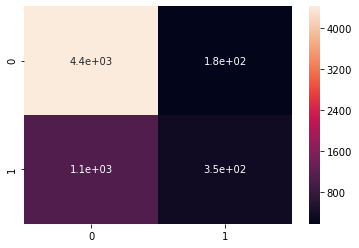

In [51]:
sns.heatmap(cm, annot=True)

In [52]:
#true positive = data asli benar, prediksi bener -> 4400
#true negative = data asli false, prediksi salah -> 350
#false positive = data asli false, tp prediksi true -> 180
#false negative = data asli benar, tp prediksi salah -> 1100